# Setep 4: Feature Engineering

In [23]:
#Clean up memory from any values
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

#-------------
import pandas as pd

#Reading data from step 2
fields = ['Type', 'IE', 'NS', 'FT', 'PJ', 'Posts','Posts_Lemmatized']
mbti_FE = pd.read_pickle('mbti_Dataset2.pkl')
mbti_FE = mbti_FE.filter(fields)
mbti_FE.head()

,Type,IE,NS,FT,PJ,Posts,Posts_Lemmatized
0,INFJ,I,N,F,J,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,"[, moment, sportscenter, top, ten, play, prank..."
1,ENTP,E,N,T,P,'I'm finding the lack of me in these posts ver...,"[finding, lack, post, alarming, sex, boring, p..."
2,INTP,I,N,T,P,'Good one _____ https://www.youtube.com/wat...,"[good, one, course, say, know, blessing, curse..."
3,INTJ,I,N,T,J,"'Dear INTP, I enjoyed our conversation the o...","[dear, enjoyed, conversation, day, esoteric, g..."
4,ENTJ,E,N,T,J,'You're fired.|||That's another silly misconce...,"[fired, another, silly, misconception, approac..."


## 4-1: Add more features to Dataset
* Number of Charecters
* Number of Words
* Number of Capital Characters
* Number of Capital Words
* Number of Punctuations
* Number of Words in quotes
* Number of Sentences
* Number of Unique Words
* Number of Stopwords
* Average of Word Lenght
* Average of Sentence Lenght
* Unique Words / Number of Words
* Stopwords / Number of Words
* Sentiment Analyzer using NLTK

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

def remove_URL(text):
    """Remove URL from the input Text"""
    return re.sub(r"http\S+", "", text)

def find_WrCapital(text):
    valid_Capital = ['INFP ', 'INFJ ', 'INTP ', 'INTJ ', 'ENTP ', 'ENFP ', 'ISTP ', 'ISFP ', 'ENTJ ', 'ISTJ ', 'ENFJ ', 'ISFJ ', 'ESTP ', 'ESFP ', 'ESFJ ', 'ESTJ ', 'MBTI ']
    match= re.findall('[A-Z]{3,15}\s{1}', text)
    match = [item for item in match if item not in valid_Capital]
    return(len(match))

def find_ChCapital(text):
    count = 0
    for i in text:
        if i.isupper():
            count+=1
    return count

def count_Punctuations(text):
    punctuations="!#$%&'()*+,-./:;<=>?@[\]^_`{}~" + '"'
    d=0
    for i in punctuations:
        d+=text.count(i)
    return d 

def count_Words_in_quotes(text):
    x = re.findall(r"(?P<quote>['\"])(?P<string>.*?)(?<!\\)(?P=quote)", text)
    return len(x)

def count_Sentences(text):
    return len(nltk.sent_tokenize(text))

def count_UniqueWords(text):
    text = re.sub(r'[^\w\s]','',text) #Remove Punctuations
    return len(set(text.split()))

def count_Stopwords(text):
    stop_Words = set(stopwords.words('english'))  
    word_Tokens = word_tokenize(text)
    stopwords_X = [w for w in word_Tokens if w in stop_Words]
    return len(stopwords_X)

def sentiment_Score(text):
    sia = SentimentIntensityAnalyzer()
    return(sia.polarity_scores(text).get('compound'))




#mbti_FE = mbti_Dataset[['Type', 'Posts', 'IE', 'NS', 'FT', 'PJ']].copy()
mbti_FE['No_Characters'] = mbti_FE['Posts'].apply(lambda X: len(remove_URL(X)) - remove_URL(X).count(' '))
mbti_FE['No_Words'] = mbti_FE['Posts'].apply(lambda X: len(remove_URL(X).split()))
mbti_FE['No_Char-Capital'] = mbti_FE['Posts'].apply(lambda X: find_ChCapital(remove_URL(X)))
mbti_FE['No_Words-Capital'] = mbti_FE['Posts'].apply(lambda X: find_WrCapital(remove_URL(X)))
mbti_FE['No_Punctuations'] = mbti_FE['Posts'].apply(lambda X: count_Punctuations(remove_URL(X)))
mbti_FE['No_WordsInQuotes'] = mbti_FE['Posts'].apply(lambda X: count_Words_in_quotes(remove_URL(X)))
mbti_FE['No_Sentences'] = mbti_FE['Posts'].apply(lambda X: count_Sentences(remove_URL(X)))
mbti_FE['No_UniqueWords'] = mbti_FE['Posts'].apply(lambda X: count_UniqueWords(remove_URL(X)))
mbti_FE['No_Stopwords'] = mbti_FE['Posts'].apply(lambda X: count_Stopwords(remove_URL(X)))
mbti_FE['Avg_WordLength'] = mbti_FE['No_Characters']/mbti_FE['No_Words']
mbti_FE['Avg_SentLength'] = mbti_FE['No_Words']/mbti_FE['No_Sentences']
mbti_FE['UniqueWrd_vs_NoWrd'] = mbti_FE['No_UniqueWords']/mbti_FE['No_Words']
mbti_FE['Stopwords_vs_NoWrd'] = mbti_FE['No_Stopwords']/mbti_FE['No_Words']
mbti_FE['Sentiment_Score'] = mbti_FE['Posts'].apply(lambda X: sentiment_Score(remove_URL(X)))

mbti_FE.head()

,Type,IE,NS,FT,PJ,Posts,Posts_Lemmatized,No_Characters,No_Words,No_Char-Capital,...,No_Punctuations,No_WordsInQuotes,No_Sentences,No_UniqueWords,No_Stopwords,Avg_WordLength,Avg_SentLength,UniqueWrd_vs_NoWrd,Stopwords_vs_NoWrd,Sentiment_Score
0,INFJ,I,N,F,J,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,"[, moment, sportscenter, top, ten, play, prank...",2760,548,73,...,141,9,24,355,238,5.036496,22.833333,0.647810,0.434307,0.9805
1,ENTP,E,N,T,P,'I'm finding the lack of me in these posts ver...,"[finding, lack, post, alarming, sex, boring, p...",5241,1166,312,...,287,26,81,545,484,4.494854,14.395062,0.467410,0.415094,0.9993
2,INTP,I,N,T,P,'Good one _____ https://www.youtube.com/wat...,"[good, one, course, say, know, blessing, curse...",4168,833,151,...,227,15,41,463,338,5.003601,20.317073,0.555822,0.405762,0.9983
3,INTJ,I,N,T,J,"'Dear INTP, I enjoyed our conversation the o...","[dear, enjoyed, conversation, day, esoteric, g...",5071,1062,245,...,294,28,67,518,469,4.774953,15.850746,0.487759,0.441620,0.9974
4,ENTJ,E,N,T,J,'You're fired.|||That's another silly misconce...,"[fired, another, silly, misconception, approac...",4717,965,201,...,232,14,65,500,436,4.888083,14.846154,0.518135,0.451813,0.9396


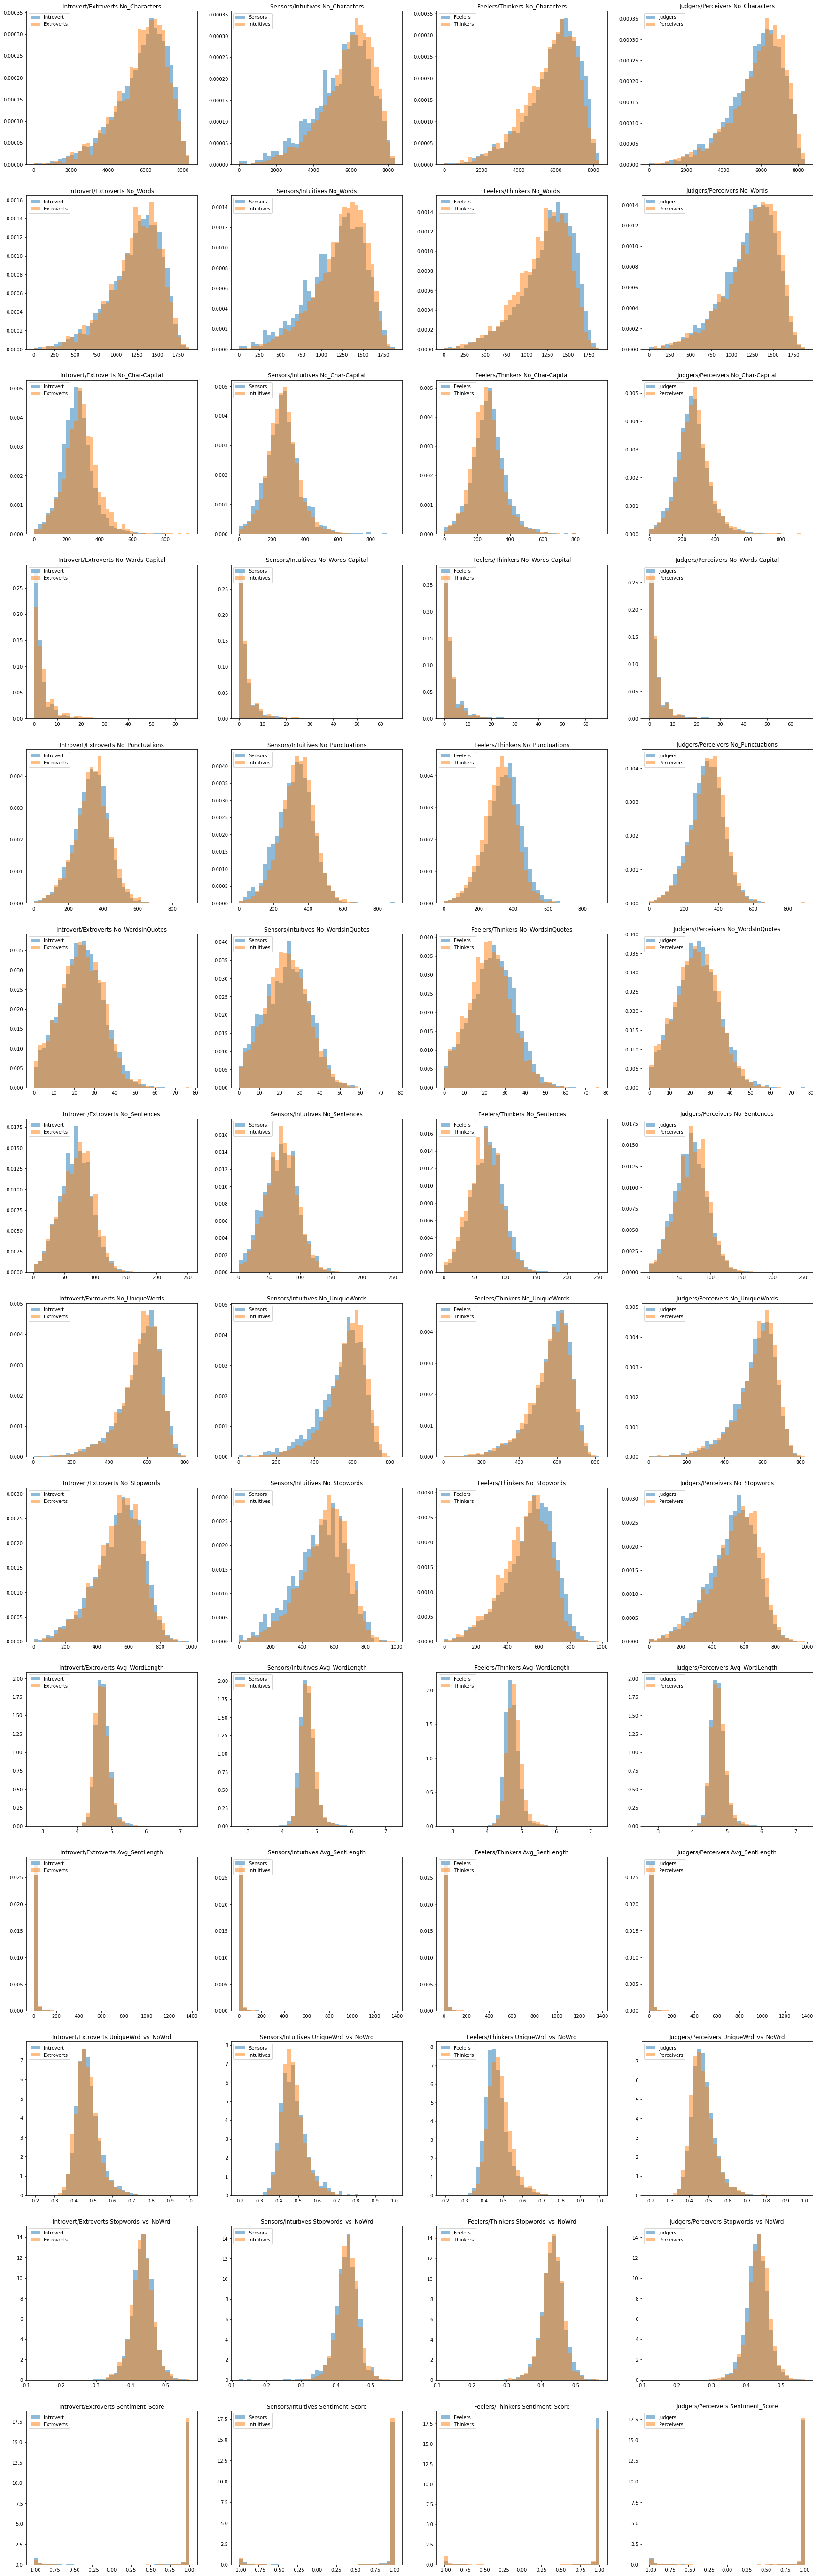

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

feature_List = ['No_Characters', 'No_Words', 'No_Char-Capital', 'No_Words-Capital', 'No_Punctuations', 'No_WordsInQuotes', 'No_Sentences', 'No_UniqueWords', 'No_Stopwords', 'Avg_WordLength', 'Avg_SentLength', 'UniqueWrd_vs_NoWrd', 'Stopwords_vs_NoWrd','Sentiment_Score']

fig, ax = plt.subplots(len(feature_List),4, figsize=(30,100))

for i, feature in enumerate(feature_List):
    bins = np.linspace(mbti_FE[feature].min(), mbti_FE[feature].max(), 40)
    ax[i,0].hist(mbti_FE[mbti_FE['IE'] == 'I'][feature], bins, alpha = 0.5, density=True, label = 'Introvert')
    ax[i,0].hist(mbti_FE[mbti_FE['IE'] == 'E'][feature], bins, alpha = 0.5, density=True, label = 'Extroverts')
    ax[i,0].legend(loc='upper left')
    ax[i,0].title.set_text('Introvert/Extroverts ' + feature)

    ax[i,1].hist(mbti_FE[mbti_FE['NS'] == 'S'][feature], bins, alpha = 0.5, density=True, label = 'Sensors')
    ax[i,1].hist(mbti_FE[mbti_FE['NS'] == 'N'][feature], bins, alpha = 0.5, density=True, label = 'Intuitives')
    ax[i,1].legend(loc='upper left')
    ax[i,1].title.set_text('Sensors/Intuitives ' + feature)

    ax[i,2].hist(mbti_FE[mbti_FE['FT'] == 'F'][feature], bins, alpha = 0.5, density=True, label = 'Feelers')
    ax[i,2].hist(mbti_FE[mbti_FE['FT'] == 'T'][feature], bins, alpha = 0.5, density=True, label = 'Thinkers')
    ax[i,2].legend(loc='upper left')
    ax[i,2].title.set_text('Feelers/Thinkers ' + feature)

    ax[i,3].hist(mbti_FE[mbti_FE['PJ'] == 'P'][feature], bins, alpha = 0.5, density=True, label = 'Judgers')
    ax[i,3].hist(mbti_FE[mbti_FE['PJ'] == 'J'][feature], bins, alpha = 0.5, density=True, label = 'Perceivers')
    ax[i,3].legend(loc='upper left')
    ax[i,3].title.set_text('Judgers/Perceivers ' + feature)

plt.show()


In [47]:
from IPython.display import display, HTML

display(mbti_FE.groupby(['IE']).mean())
print('')
display(mbti_FE.groupby(['NS']).mean())
print('')
display(mbti_FE.groupby(['FT']).mean())
print('')
display(HTML(mbti_FE.groupby(['PJ']).mean().to_html()))

,No_Characters,No_Words,No_Char-Capital,No_Words-Capital,No_Punctuations,No_WordsInQuotes,No_Sentences,No_UniqueWords,No_Stopwords,Avg_WordLength,Avg_SentLength,UniqueWrd_vs_NoWrd,Stopwords_vs_NoWrd,Sentiment_Score
IE,,,,,,,,,,,,,,
E,5783.668834,1228.201601,288.473737,4.090545,340.535268,23.404202,70.758379,562.932966,535.227114,4.732826,20.686282,0.470529,0.433009,0.898034
I,5785.737567,1223.717645,261.711055,2.897394,332.834781,23.394847,68.606950,564.270821,533.493110,4.751631,20.609334,0.474503,0.432725,0.862006


,No_Characters,No_Words,No_Char-Capital,No_Words-Capital,No_Punctuations,No_WordsInQuotes,No_Sentences,No_UniqueWords,No_Stopwords,Avg_WordLength,Avg_SentLength,UniqueWrd_vs_NoWrd,Stopwords_vs_NoWrd,Sentiment_Score
NS,,,,,,,,,,,,,,
N,5826.821343,1232.481813,267.979674,3.216101,336.703664,23.413881,69.284033,567.581974,537.744584,4.750553,20.687573,0.473017,0.433334,0.872335
S,5525.620718,1176.453634,267.243108,2.898914,321.524645,23.291562,67.969925,541.350877,509.828739,4.726964,20.249055,0.477147,0.429393,0.857648


,No_Characters,No_Words,No_Char-Capital,No_Words-Capital,No_Punctuations,No_WordsInQuotes,No_Sentences,No_UniqueWords,No_Stopwords,Avg_WordLength,Avg_SentLength,UniqueWrd_vs_NoWrd,Stopwords_vs_NoWrd,Sentiment_Score
FT,,,,,,,,,,,,,,
F,5861.905624,1249.490200,273.380699,3.342352,344.568172,24.046868,70.610141,566.013634,545.018747,4.713564,20.533540,0.465753,0.433036,0.917119
T,5694.888973,1195.580759,261.389852,2.971866,322.866616,22.630746,67.325295,561.544084,520.773926,4.787073,20.737341,0.482824,0.432500,0.815114


,No_Characters,No_Words,No_Char-Capital,No_Words-Capital,No_Punctuations,No_WordsInQuotes,No_Sentences,No_UniqueWords,No_Stopwords,Avg_WordLength,Avg_SentLength,UniqueWrd_vs_NoWrd,Stopwords_vs_NoWrd,Sentiment_Score
PJ,,,,,,,,,,,,,,
J,5866.527956,1240.662202,272.013978,3.084450,339.135119,23.225976,70.370414,568.006115,543.603087,4.753985,20.652973,0.470895,0.434933,0.882290
P,5732.013165,1214.325510,265.168098,3.229918,331.643770,23.509063,68.272085,561.313108,527.530242,4.742916,20.610090,0.475351,0.431386,0.862458


In [60]:
import pandas as pd
import numpy as np

corr = mbti_FE.corr()
corr.style.background_gradient(cmap='coolwarm')

,No_Characters,No_Words,No_Char-Capital,No_Words-Capital,No_Punctuations,No_WordsInQuotes,No_Sentences,No_UniqueWords,No_Stopwords,Avg_WordLength,Avg_SentLength,UniqueWrd_vs_NoWrd,Stopwords_vs_NoWrd,Sentiment_Score
No_Characters,1.000000,0.986772,0.542037,0.072869,0.802698,0.561370,0.643346,0.941266,0.949791,-0.283430,-0.059478,-0.767735,0.339776,0.127475
No_Words,0.986772,1.000000,0.535926,0.074874,0.775315,0.549167,0.647865,0.914450,0.972356,-0.421921,-0.053285,-0.822944,0.377441,0.134002
No_Char-Capital,0.542037,0.535926,1.000000,0.392774,0.585425,0.377670,0.533165,0.522292,0.415334,-0.148533,-0.153533,-0.413807,-0.206055,0.116559
No_Words-Capital,0.072869,0.074874,0.392774,1.000000,0.148242,0.022970,0.094780,0.110689,0.035450,-0.023960,-0.016268,-0.013911,-0.118427,-0.021300
No_Punctuations,0.802698,0.775315,0.585425,0.148242,1.000000,0.637947,0.685282,0.765192,0.703321,-0.135249,-0.149416,-0.577789,0.111739,0.142299
No_WordsInQuotes,0.561370,0.549167,0.377670,0.022970,0.637947,1.000000,0.462520,0.521580,0.500872,-0.142368,-0.118412,-0.430228,0.092767,0.077698
No_Sentences,0.643346,0.647865,0.533165,0.094780,0.685282,0.462520,1.000000,0.623762,0.571722,-0.257215,-0.342284,-0.501998,0.035069,0.097903
No_UniqueWords,0.941266,0.914450,0.522292,0.110689,0.765192,0.521580,0.623762,1.000000,0.845947,-0.212995,-0.076101,-0.577430,0.206143,0.111733
No_Stopwords,0.949791,0.972356,0.415334,0.035450,0.703321,0.500872,0.571722,0.845947,1.000000,-0.454788,-0.017681,-0.848013,0.568407,0.125612
Avg_WordLength,-0.283430,-0.421921,-0.148533,-0.023960,-0.135249,-0.142368,-0.257215,-0.212995,-0.454788,1.000000,-0.010919,0.604312,-0.344290,-0.090979


In [7]:
#import matplotlib.pyplot as plt
#for i in [1,2,3,4,5]:
#    plt.hist((mbti_FE['No_Characters'])**(1/i), bins=40)
#    plt.title('Transformation: 1/{}'.format(str(i)))
#    plt.show()


In [6]:
#Save new features information 
mbti_FE.to_pickle('mbti_FE.pkl')